In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def load_pickle(fname):
    with open(fname, 'rb') as f:
        return pickle.load(f)

In [8]:
confidences_all = load_pickle('../../data/label_studio/all_paddle_confidences.pkl')
offsets = load_pickle('../../data/label_studio/both_offsets.pkl')
labels = load_pickle('../../data/label_studio/both_labels.pkl')
preds = load_pickle('../../data/label_studio/both_paddle_predictions.pkl')

In [7]:
# because i only stored confidences for all orientations, we first need to retrieve the ones corresponding to the correct orientations

In [9]:
confidences = []
for idx, offset in enumerate(offsets):
    confidences += [confidences_all[4*idx + offset]]

Text(0.5, 1.0, 'paddle confidences')

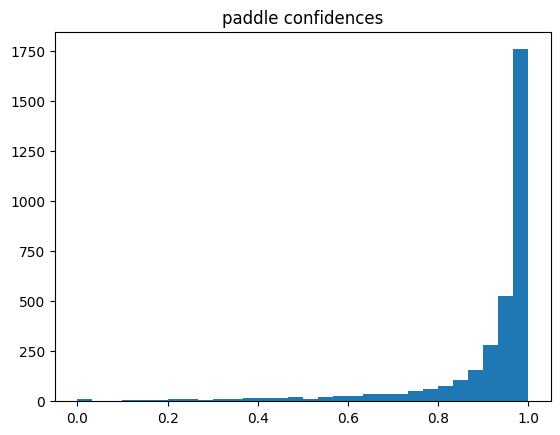

In [11]:
# investigate distribution of confidences

plt.hist(confidences, bins='rice')
plt.title('paddle confidences')

In [38]:
bins = 1.05**(-np.arange(10))
bins = bins[::-1]
bins = np.asarray([0]+bins.tolist())
print((100*bins).astype(np.int32))

[  0  64  67  71  74  78  82  86  90  95 100]


(array([ 252.,   38.,   31.,   38.,   73.,   80.,  125.,  213.,  466.,
        2043.]),
 array([0.        , 0.64460892, 0.67683936, 0.71068133, 0.7462154 ,
        0.78352617, 0.82270247, 0.8638376 , 0.90702948, 0.95238095,
        1.        ]),
 <BarContainer object of 10 artists>)

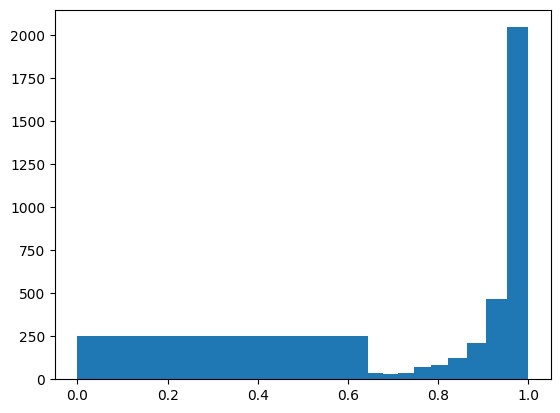

In [39]:
plt.hist(confidences, bins=bins)

In [50]:
bin_ids = []

bins[0] = -0.1
for element in confidences:
    for i in range(1, len(bins)):
        if bins[i-1] < element <= bins[i]:
            bin_ids += [i]
            break

print(confidences[:10])
print(bin_ids[:10])

[0.87968385 0.85956609 0.90861464 0.88978636 0.9766326  0.91068888
 0.3628608  0.95030481 0.97488523 0.96576661]
[8, 7, 9, 8, 10, 9, 1, 9, 10, 10]


In [51]:
bin_ids = np.asarray(bin_ids)
confidences = np.asarray(confidences)

In [52]:
# compute levenshtein distance per bin

In [53]:
import sys
sys.path.append('../../')
from ocr_ensemble.evaluation import levenshtein as lev

In [54]:
levs = np.asarray([lev(gt, pred) for gt, pred in zip(labels, preds)])

In [63]:
means = []
stds = []
cnts = []
for bin_id in range(1, len(bins)):
    means += [np.mean(levs[bin_ids == bin_id])]
    stds += [np.std(levs[bin_ids == bin_id])]
    cnts += [np.sum(bin_ids == bin_id)]

means = np.asarray(means)
stds = np.asarray(stds)
cnts = np.asarray(cnts)

In [101]:
def gaussian_confidence_plot(means, stds, cnts, bins):
    upper = means + 1.96*stds/np.sqrt(cnts)
    lower = means - 1.96*stds/np.sqrt(cnts)
    x = np.arange(len(means))
    plt.plot(x, means)
    plt.fill_between(x, lower, upper, color='blue', alpha=0.5)
    plt.plot(x, [1]*len(x), 'r-.')
    plt.xticks(np.arange(0, len(bins)-1),  ['%.2f'%b for b in bins[1:]])
    plt.xlim(0, len(bins)-2)
    plt.ylim(0, upper.max())

Text(0.5, 0, 'upper end of bin')

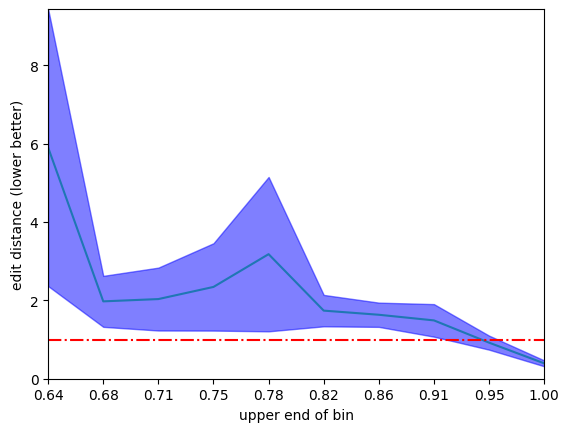

In [103]:
gaussian_confidence_plot(means, stds, cnts, bins)
plt.ylabel('edit distance (lower better)')
plt.xlabel('upper end of bin')

In [104]:
(confidences > 0.91).sum() / len(confidences)

0.7401012206013694

In [108]:
preds = np.asarray(preds)
labels = np.asarray(labels)

preds_keep = preds[confidences > 0.91]
labels_keep = labels[confidences > 0.91]

In [113]:
for _ in range(20):
    idx = np.random.randint(len(preds_keep))
    print('%s\n%s'%(labels_keep[idx], preds_keep[idx]))

DANUBE
DANUBE
Ask a question or
Ask a question or
KILLESTER
KILLESTER
TO
TO
B b O o
BbOo
VOTING
VOTING
ACROSS
ACROSS
Huerco S.
Huerco S.
www.mannaplay.com
www.mannaplay.com
NEWS
NEWS
BASS
BASS
9
9
21
21
max
nax
Original Mix
Original Mix
14
14
RATE
RATE
OW!
W!
Analytics
Analytics
6.8 - 8.5
6.8 - 8.5
